In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
train=pd.read_csv(r'C:\Users\ashish_s\Downloads\Compressed\house-prices-advanced-regression-techniques_2\train.csv').set_index('Id')

In [43]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [45]:
test=pd.read_csv(r'C:\Users\ashish_s\Downloads\Compressed\house-prices-advanced-regression-techniques_2\test.csv').set_index('Id')

In [46]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [47]:
test.isnull().sum().head(5)

MSSubClass       0
MSZoning         4
LotFrontage    227
LotArea          0
Street           0
dtype: int64

In [48]:
test.drop(['MSZoning','LotFrontage','Alley','Utilities','Exterior1st','Exterior2nd','MasVnrArea','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'],axis=1,inplace=True)

In [49]:
test.isnull().sum().head(5)

MSSubClass     0
LotArea        0
Street         0
LotShape       0
LandContour    0
dtype: int64

In [50]:
test.drop(['KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond'],axis=1,inplace=True)

In [51]:
test.isnull().sum().head(5)

MSSubClass     0
LotArea        0
Street         0
LotShape       0
LandContour    0
dtype: int64

In [52]:
test.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

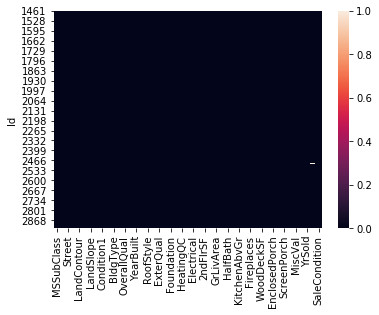

In [53]:
sns.heatmap(test.isnull())

In [54]:
test.head()

,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,...,0,0,0,120,0,0,6,2010,WD,Normal
1462,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,...,36,0,0,0,0,12500,6,2010,WD,Normal
1463,60,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,...,34,0,0,0,0,0,3,2010,WD,Normal
1464,60,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,...,36,0,0,0,0,0,6,2010,WD,Normal
1465,120,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,...,82,0,0,144,0,0,1,2010,WD,Normal


In [55]:
S=pd.get_dummies(test['Street'],drop_first=1)
Ls=pd.get_dummies(test['LotShape'],drop_first=1)
Lc=pd.get_dummies(test['LotConfig'],drop_first=1)
ST=pd.get_dummies(test['SaleType'],drop_first=1)
Sc=pd.get_dummies(test['SaleCondition'],drop_first=1)

In [56]:
test.drop(['Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle'],axis=1,inplace=True)

In [57]:
test.drop(['RoofStyle','RoofMatl','ExterQual','ExterCond','Foundation','Heating','CentralAir','Electrical','PavedDrive','SaleType','SaleCondition','HeatingQC'],axis=1,inplace=True)

In [58]:
test=pd.concat([test,S,Ls,Lc,ST,Sc],axis=1)

In [59]:
test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,11622,5,6,1961,1961,896,0,0,896,...,0,0,0,0,1,0,0,0,1,0
1462,20,14267,6,6,1958,1958,1329,0,0,1329,...,0,0,0,0,1,0,0,0,1,0
1463,60,13830,5,5,1997,1998,928,701,0,1629,...,0,0,0,0,1,0,0,0,1,0
1464,60,9978,6,6,1998,1998,926,678,0,1604,...,0,0,0,0,1,0,0,0,1,0
1465,120,5005,8,5,1992,1992,1280,0,0,1280,...,0,0,0,0,1,0,0,0,1,0


In [60]:
train.drop(['MSZoning','LotFrontage','Alley','Utilities','Exterior1st','Exterior2nd','MasVnrArea','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'],axis=1,inplace=True)

In [61]:
train.drop(['KitchenQual','Functional','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond'],axis=1,inplace=True)

In [62]:
train.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

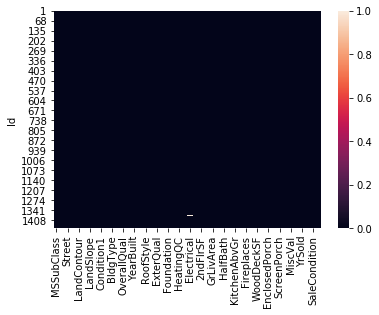

In [63]:
sns.heatmap(train.isnull())

In [64]:
S1=pd.get_dummies(train['Street'],drop_first=1)
Ls1=pd.get_dummies(train['LotShape'],drop_first=1)
Lc1=pd.get_dummies(train['LotConfig'],drop_first=1)
ST1=pd.get_dummies(train['SaleType'],drop_first=1)
Sc1=pd.get_dummies(train['SaleCondition'],drop_first=1)

In [65]:
train.drop(['Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle'],axis=1,inplace=True)

In [66]:
train.drop(['RoofStyle','RoofMatl','ExterQual','ExterCond','Foundation','Heating','CentralAir','Electrical','PavedDrive','SaleType','SaleCondition','HeatingQC'],axis=1,inplace=True)

In [67]:
train=pd.concat([train,S1,Ls1,Lc1,ST1,Sc1],axis=1)

In [68]:
train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,856,854,0,1710,...,0,0,0,0,1,0,0,0,1,0
2,20,9600,6,8,1976,1976,1262,0,0,1262,...,0,0,0,0,1,0,0,0,1,0
3,60,11250,7,5,2001,2002,920,866,0,1786,...,0,0,0,0,1,0,0,0,1,0
4,70,9550,7,5,1915,1970,961,756,0,1717,...,0,0,0,0,1,0,0,0,0,0
5,60,14260,8,5,2000,2000,1145,1053,0,2198,...,0,0,0,0,1,0,0,0,1,0


In [69]:
x=train.drop('SalePrice',axis=1)

In [70]:
y=train['SalePrice']

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1001)

In [112]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [113]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [114]:
pred=model.predict(test)

In [115]:
pd.DataFrame({'SalePrice': pred}, index=test.index).reset_index().to_csv('ThisIsAshish.csv', index=False)